In [1]:
import time
import nest
import network
import addons
import helpers
import random
import numpy as np
import pandas as pd 
from network_params import net_dict
from sim_params import sim_dict
from stimulus_params import stim_dict
from scipy.stats import pearsonr

time_start = time.time()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



### Computing Synchrony

Measurement of different Synchrony quantities from the spike times obtained in the simulation. 

Measurements:

    - Synchrony (as defined by Potjans Diesmann)

    - Second Synchrony measurement (to make sure there are no bias)

    - Irregularity (CV ISI as defined by Potjans Diesmann)
    
    - LvR (as defined by pronold, 2024)

Irregularity and LvR will have a singular value for each population, and a pdf for each population, aswell

In [2]:
name = addons.analysis_dict["name"]

/home/hyc_1/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:invalid value encountered in divide


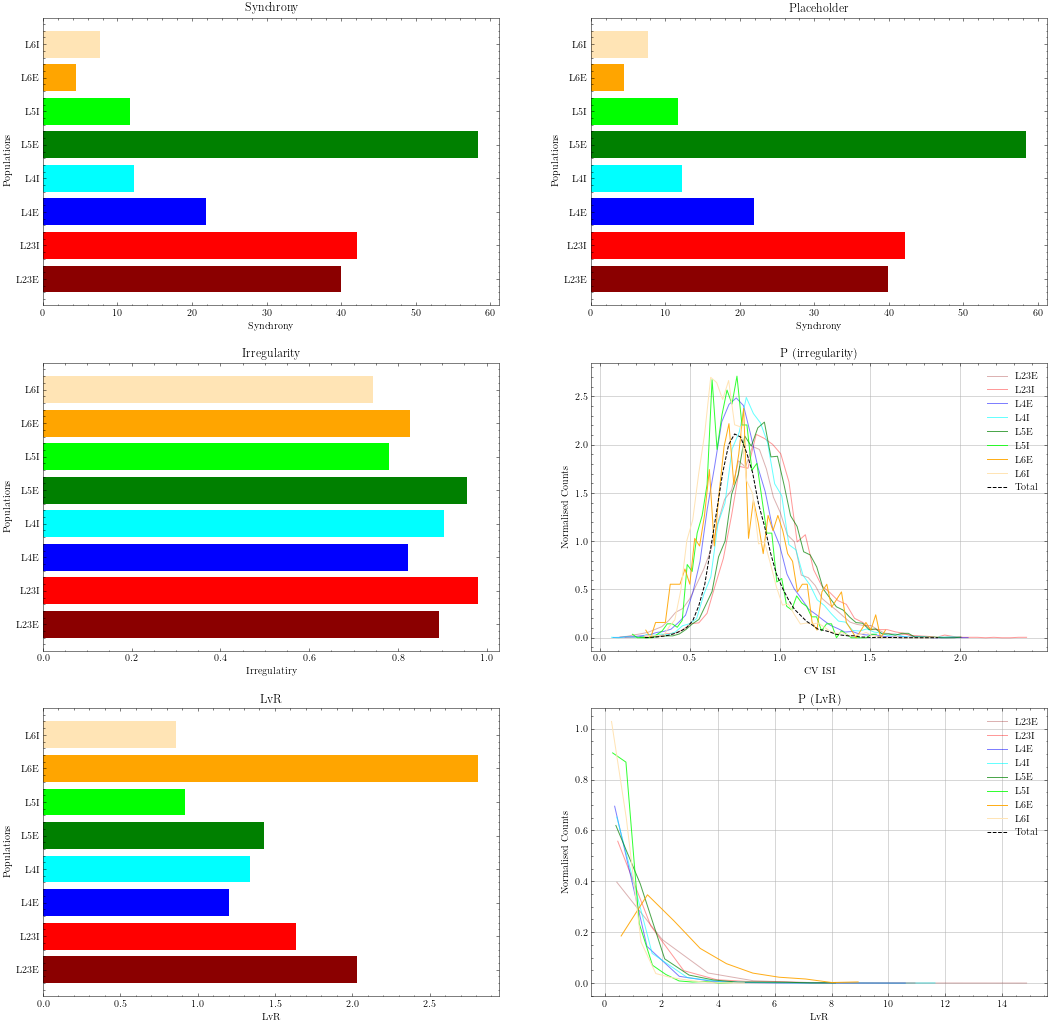

In [3]:
synchrony_pd, irregularity, irregularity_pdf, lvr, lvr_pdf, times_s = addons.analyse_synchrony()
addons.plot_synchrony(synchrony_pd,irregularity,irregularity_pdf,lvr,lvr_pdf)

In [4]:
np.savetxt(name + "synchrony.dat",synchrony_pd)
np.savetxt(name + "irregularity.dat",irregularity)
np.savetxt(name + "lvr.dat",lvr)

for i in irregularity_pdf:
    np.savetxt(name + "irregularities/irregularity_"+str(i)+".dat",irregularity_pdf[i])
for i in lvr_pdf:
    np.savetxt(name + "lvrs/lvr_"+str(i)+".dat",lvr_pdf[i])
for i in times_s:
    np.savetxt(name + "times/time_"+str(i)+".dat",times_s[i])


### Computing Firing Rates

Measurement of different Firing Rates quantities from the spike times obtained in the simulation. 

Measurements:

    - Firing rate histogram and pdf per population
    
    - Color map of the evolution of firing rates as a function of time

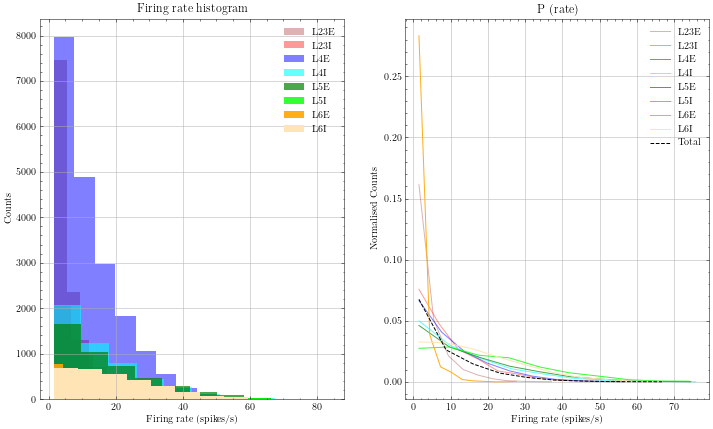

In [5]:
spike_rates = addons.analyse_firing_rates()
addons.plot_firing_rates(spike_rates)

In [6]:
for i in spike_rates:
    np.savetxt(name + "spike_rates/spike_rate_"+str(i)+".dat",spike_rates[i])

### Computing Correlations

Measurement of Correlations between different quantities of the simulation.

For that, it's important to first load all of the data

In [7]:
neuron_id = np.loadtxt("data_og/population_nodeids.dat",dtype=int)
num_neurons = []
for i in range(len(neuron_id)):
    num_neurons = np.append(num_neurons,int(neuron_id[i][1]-neuron_id[i][0]+1))
num_neurons = num_neurons.astype(int)

In [ ]:
##### NUMERO DE NEURONAS

voltage_data = addons.load_voltage("data_og/","voltmeter")
time_data = addons.get_time(voltage_data,num_neurons[0]) 
data_pop = {}
ex_current_pop = {}
in_current_pop = {}
pop_activity = {}
names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
for i in range(len(num_neurons)):
    data_pop[i] = addons.split_voltage(voltage_data[i], num_neurons[i])

del(voltage_data)
ex_current_data = addons.load_current("data_og/","ex_current")
for i in range(len(num_neurons)):
    ex_current_pop[i] = addons.split_current(ex_current_data[i],num_neurons[i])

del(ex_current_data)
in_current_data = addons.load_current("data_og/","in_current")
for i in range(len(num_neurons)):
    in_current_pop[i] = addons.split_current(in_current_data[i], num_neurons[i])

del(in_current_data)

for i in range(len(num_neurons)):
    pop_activity[names[i]] = np.loadtxt(addons.analysis_dict["name"]+"/pop_activities/pop_activity_"+str(i)+".dat")


In [9]:
data_voltages, data_excitatory, data_inhibitory, times, times_help = addons.prepare_data(data_pop,ex_current_pop,in_current_pop)

{'L23E': array([  4.22334388,   4.98174497,   5.42655121, ..., 769.96801499,
       671.77944238, 534.98613818]), 'L23I': array([ 17.52802056,  25.58004306,  34.97401021, ..., 269.81453801,
       257.3288379 , 224.46052745]), 'L4E': array([  9.86207117,   9.86207117,   8.82496903, ..., 195.41317458,
       174.17495562, 141.70182806]), 'L4I': array([ 31.92257357,  32.54483485,  29.74465907, ..., 216.79580427,
       184.82437514, 143.75722589]), 'L5E': array([ 20.31262748,  25.21331357,  28.73860844, ..., 430.55227347,
       387.67739514, 318.89865944]), 'L5I': array([ 4.45514885, 11.31930656, 18.33873115, ..., 44.74985996,
       37.41514366, 21.28292942]), 'L6E': array([ 2.48902756,  2.76499381,  2.48902756, ..., 17.01608547,
       17.48609786, 14.78470773]), 'L6I': array([21.53385374, 35.77909649, 55.33661211, ..., 13.06061071,
        8.47020435,  5.99006937])}
            L23E        L23I         L4E         L4I         L5E        L5I  \
0       4.223344   17.528021    9.862071

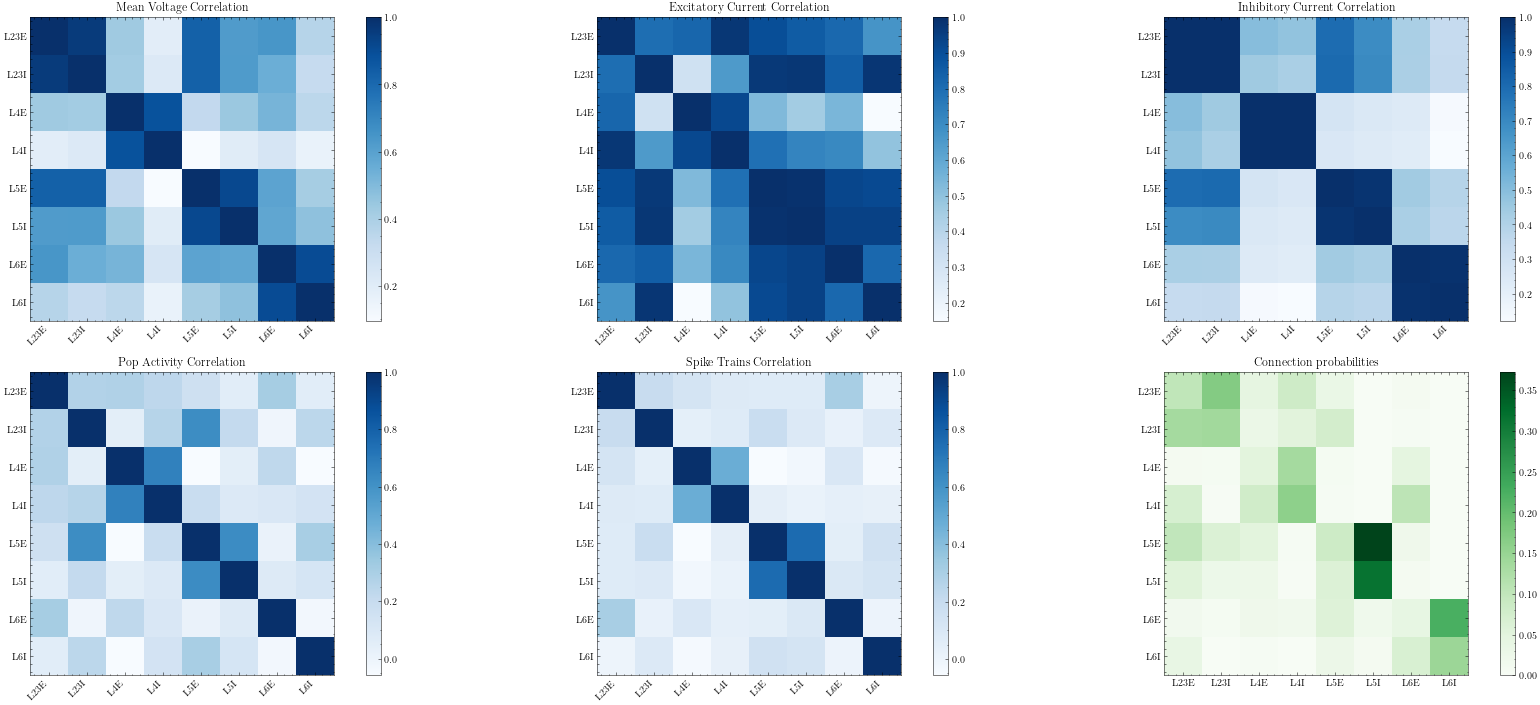

In [27]:
addons.plot_correlations(data_voltages,data_excitatory,data_inhibitory,pop_activity,times)